<a href="https://colab.research.google.com/github/Sowmya-2348562/Computer-Vision/blob/main/2348562_Lab6_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Non-linear spatial filtering techniques**

Median filter

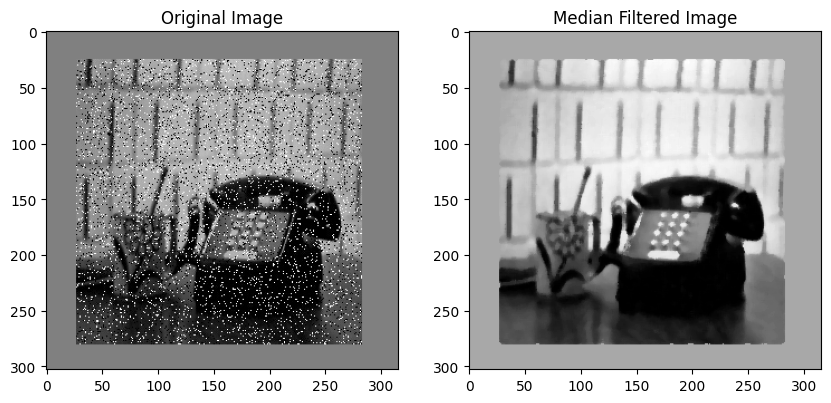

In [ ]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread("/content/median.png", cv2.IMREAD_GRAYSCALE)

# Apply Median Filter for Segmentation Improvement
median_filtered_image = cv2.medianBlur(image, 5)  # Applying median filter with a kernel size of 5

# Make the images larger when it renders
plt.figure(figsize=(10, 10))

# Render the original and median filtered images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap="gray")
plt.title('Median Filtered Image')

plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/pict.png")

In [ ]:
# User-defined median filter
def user_defined_median_filter(image, kernel_size):
    height, width, _ = image.shape
    padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            window = padded_image[i:i+kernel_size, j:j+kernel_size, :]
            median = np.median(window, axis=(0,1))
            filtered_image[i, j, :] = median
    return filtered_image

In [ ]:
user_defined_median_filtered = user_defined_median_filter(image, 5)

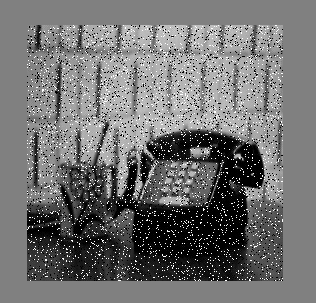

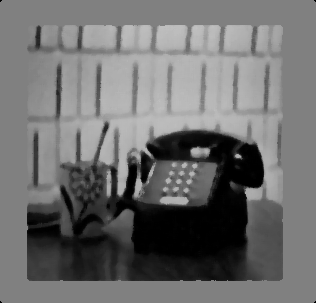

In [ ]:
cv2_imshow(image)
cv2_imshow(user_defined_median_filtered)

Maximum filter

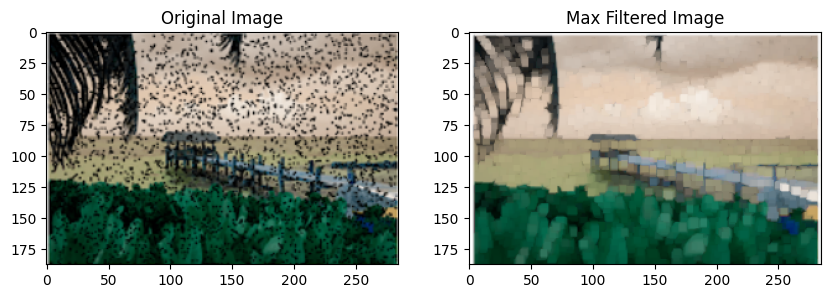

In [ ]:
# Define kernel size for the max filter
kernel_size = 5

# Apply the max filter using a kernel of specified size
max_filtered_image = cv2.dilate(image, kernel=np.ones((kernel_size, kernel_size), np.uint8))

# Display the original and max filtered images
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Max Filtered Image')

plt.show()

In [ ]:
# User-defined max filter
def user_defined_max_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.dilate(image, kernel)

In [ ]:
user_defined_max_filtered = user_defined_max_filter(image, 5)

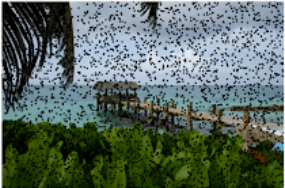

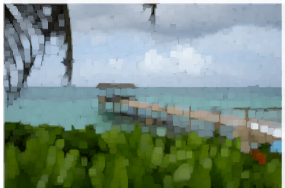

In [ ]:
cv2_imshow(image)
cv2_imshow(user_defined_max_filtered)

Minimum filter

In [ ]:
image = cv2.imread("/content/camman.jpg")

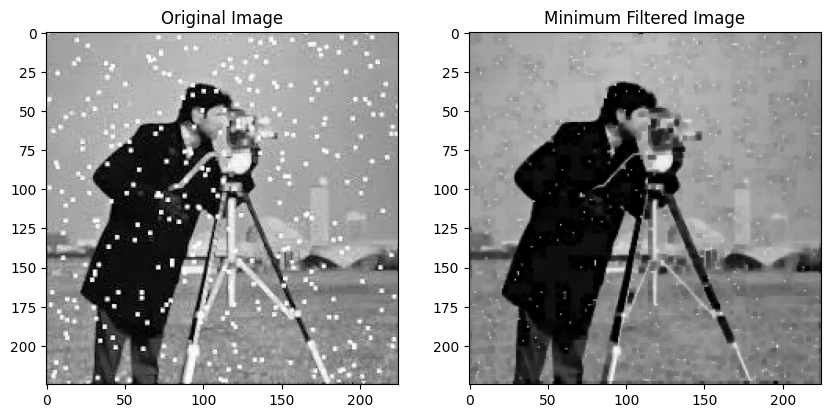

In [ ]:
# Apply the minimum filter using a kernel 3x3
min_filtered_image = cv2.erode(image, kernel=np.ones((3,3),np.uint8))

# Display the original and minimum filtered images
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Minimum Filtered Image')

plt.show()

In [ ]:
# User-defined min filter
def user_defined_min_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image, kernel)


In [ ]:
user_defined_min_filtered = user_defined_min_filter(image, 5)

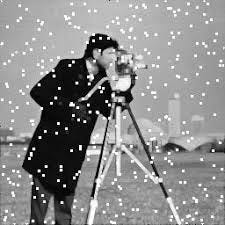

In [ ]:
cv2_imshow(image)

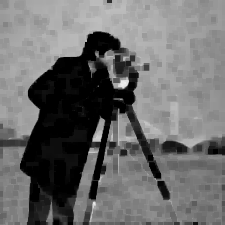

In [ ]:
cv2_imshow(user_defined_min_filtered)

Mid-Point Filter

In [ ]:
image=cv2.imread("/content/camman.jpg")

In [ ]:
# User-defined mid-point filter
def user_defined_mid_point_filter(image, kernel_size):
    max_filtered = user_defined_max_filter(image, kernel_size)
    min_filtered = user_defined_min_filter(image, kernel_size)
    return (max_filtered + min_filtered) / 2

# Built-in mid-point filter
def built_in_mid_point_filter(image, kernel_size):
    max_filtered = built_in_max_filter(image, kernel_size)
    min_filtered = built_in_min_filter(image, kernel_size)
    return (max_filtered + min_filtered) / 2

In [ ]:
user_defined_mid_point_filtered = user_defined_mid_point_filter(image, 5)
built_in_mid_point_filtered = built_in_mid_point_filter(image, 5)

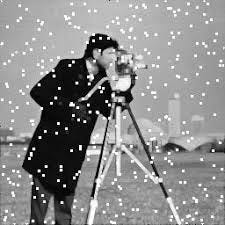

In [ ]:
cv2_imshow(image)

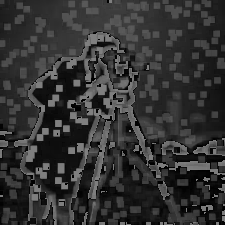

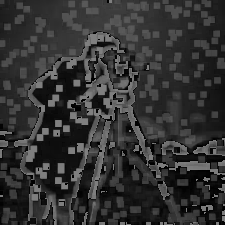

In [ ]:
cv2_imshow(user_defined_mid_point_filtered)
cv2_imshow(built_in_mid_point_filtered)

Alpha-trimmed filter

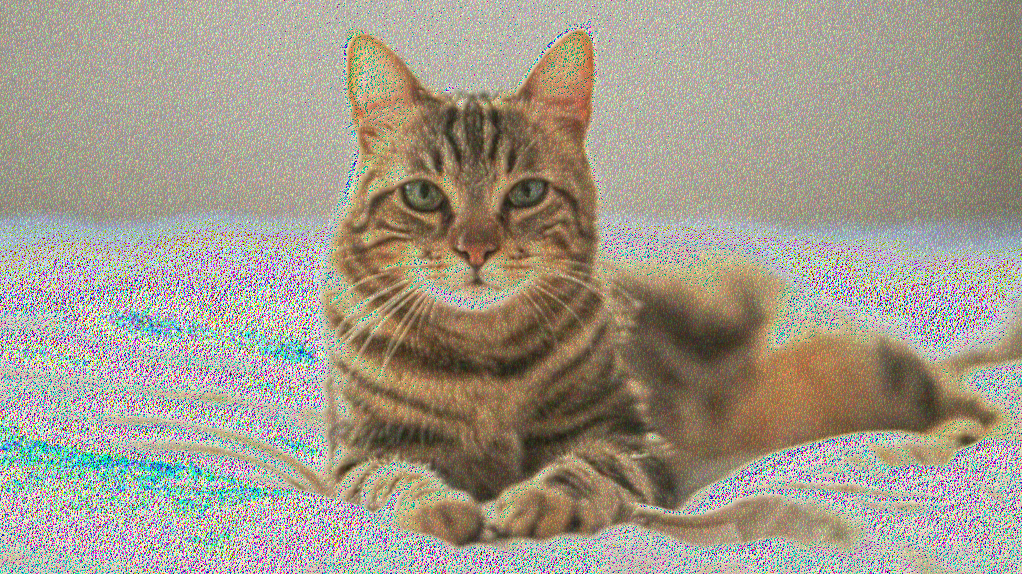

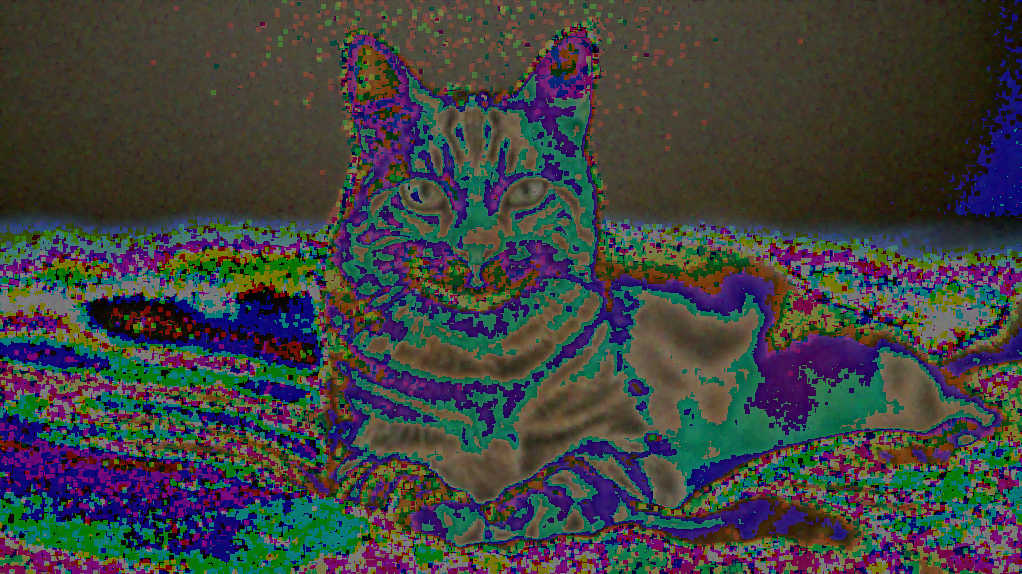

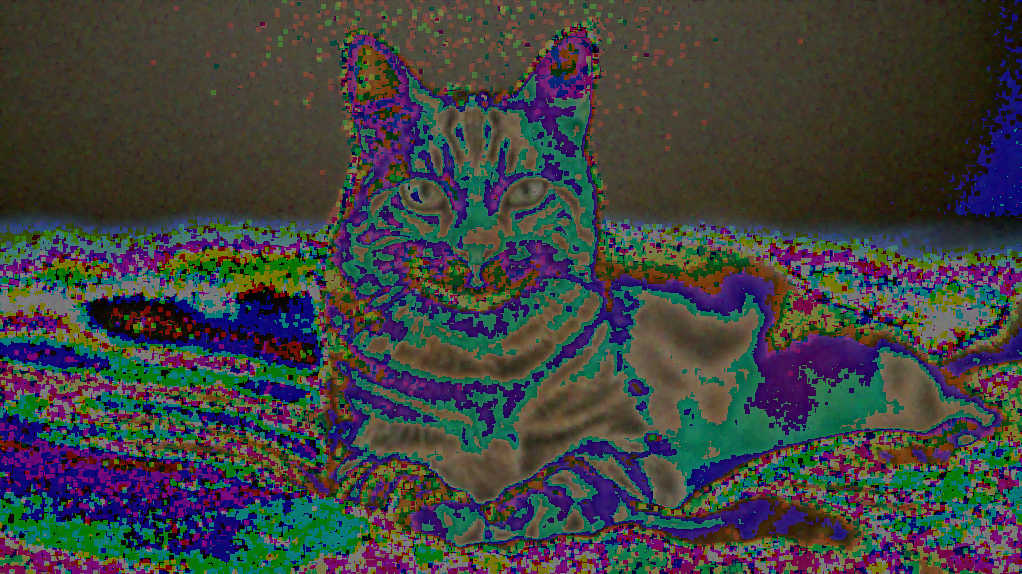

In [ ]:

image=cv2.imread("/content/cat.png")


# User-defined alpha-trimmed filter
def user_defined_alpha_trimmed_filter(image, kernel_size, alpha):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated = cv2.dilate(image, kernel)
    eroded = cv2.erode(image, kernel)
    return (dilated + eroded - alpha) / 2

# Built-in alpha-trimmed filter
def built_in_alpha_trimmed_filter(image, kernel_size, alpha):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated = cv2.dilate(image, kernel)
    eroded = cv2.erode(image, kernel)
    return (dilated + eroded - alpha) / 2

user_defined_alpha_trimmed_filtered = user_defined_alpha_trimmed_filter(image, 5, 2)
built_in_alpha_trimmed_filtered = built_in_alpha_trimmed_filter(image, 5, 2)

cv2_imshow(image)

cv2_imshow(user_defined_alpha_trimmed_filtered)
cv2_imshow(built_in_alpha_trimmed_filtered)